# William Wiemann

## Merging the two dataframe

When researching the diabetes database through Sklearn, I noticed they loaded the database as load_diabetes(return_X_y). Doing this returned my X and y. I added columns to the X dataframe, as none were present. 

Once I worked on the X dataframe, I added the disease_progression label to the y dataset, and merged the two dataframes into one. Doing this gave me a better visualization when using corr(). 

## Corresponding Values

I used a heatmap initially to see the corresponding values. We can see BMI has a large factor on the disease progression. I also posted scatter plots of the same sort of data.

## Linear Regression

I did a lot of research and found out the data is already preprocessed in the diabetes data set. I did not have to do much, prior for plotting Linear Regression. I split the data into four sets: X_train, X_test, y_train, y_test. This allows me to train a set of data and test it with the other part of the data set. I then used the LinearRegression.predict() to get the predicted values and plot them against the original.

## Polynomial Regression and Regularization

I have looked into this portion for an entire day, and what I came up with has to be accurate for the data. I looked through so many examples, and this is what the result is. I hope to see a full example of this problem worked out, so I can see where I went wrong.

In [ ]:
from sklearn.datasets import load_diabetes
# Load the data
X, y = load_diabetes(return_X_y=True)

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
import pandas as pd
# The data given by sklearn has already been scaled and preprocessed. But missing columns
df1 = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
print(df1)

          age       sex       bmi  ...       tch       ltg       glu
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]


In [ ]:
df2 = pd.DataFrame(y, columns=['disease_progression'])
print(df2)

     disease_progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [ ]:
# Merge both DataFrames to see what correlates
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


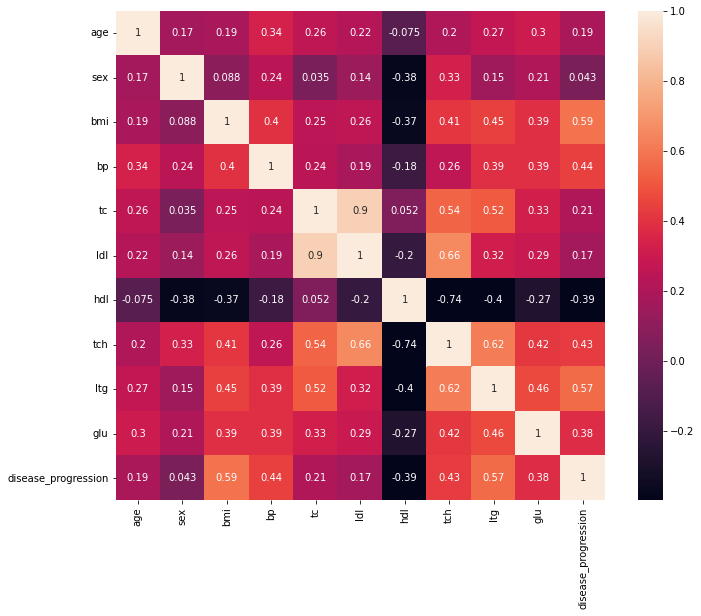

In [290]:
# I decided to show both a heat map and scatter plot to show correlation
# As I like to see a heatmap, myself.
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, robust=True, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a53415cd0>,
      dtype=object)

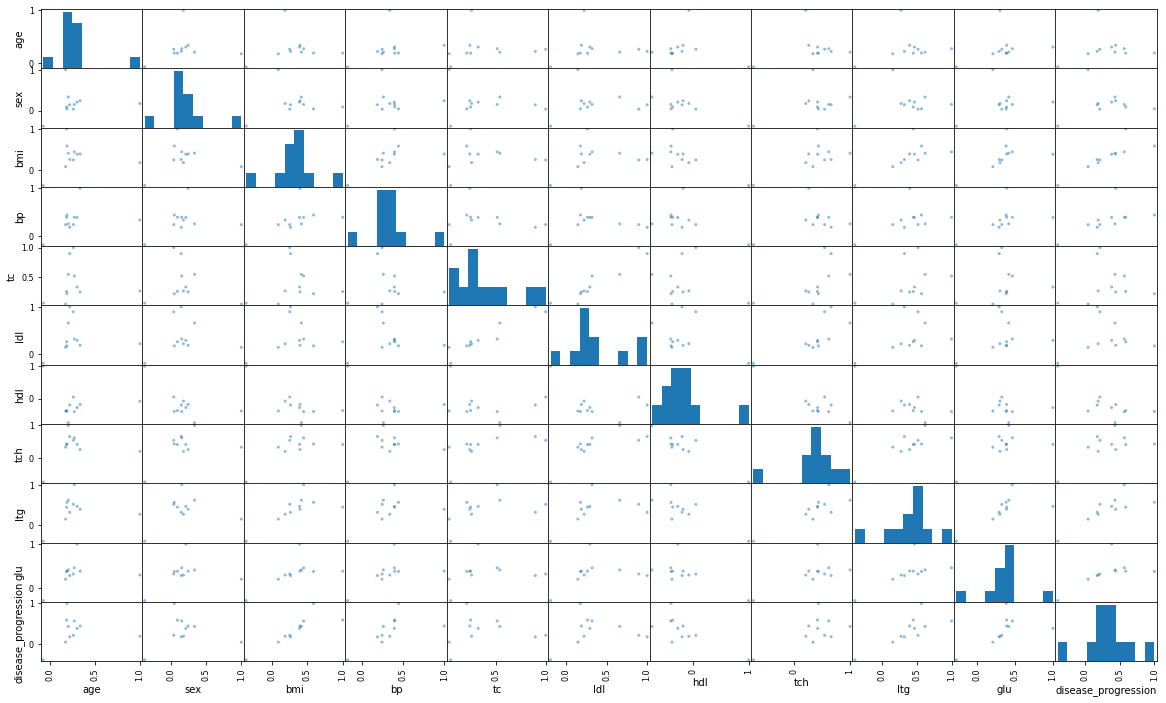

In [ ]:
from pandas.plotting import scatter_matrix
corr = df.corr()
scatter_matrix(corr, figsize=(20,12))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
diabetes = load_diabetes()

# reload the data
X = diabetes.data[:,np.newaxis,3]
y = diabetes.target

# Split into validation set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 1), (89, 1), (353,), (89,))

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Fit the model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

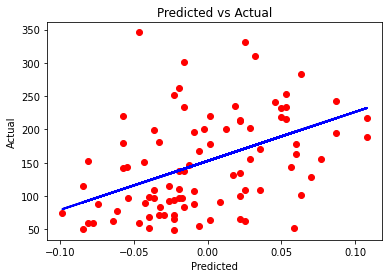

In [ ]:
# Plot and predict the model
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin_reg.predict(X_test), color='blue', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = linear_model.LinearRegression().fit(X_poly, y_train)


Text(0, 0.5, 'Actual')

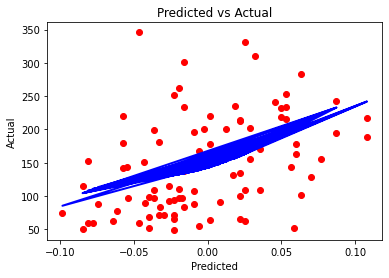

In [ ]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
 

chosen alpha 0
chosen alpha 0
chosen alpha 0
chosen alpha 0


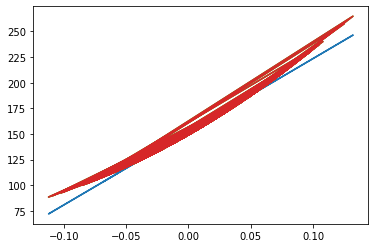

In [288]:
from sklearn.linear_model import LassoCV

for degree in [1, 3, 5, 8]:
    poly = PolynomialFeatures(degree)
    X_ = poly.fit_transform(X)
    X_plot_ = poly.fit_transform(X_train)
     
    model = LassoCV(cv=20)
    model.fit(X_, y)
    print ("chosen alpha %d" % model.alpha_)
    y_plot = model.predict(X_plot_)
    plt.plot(X_train, y_plot, label="degree %d" % degree)